<h2 style="text-align: center; font-weight: bold">Genetic Algorithm Crossovers for Travelling Salesperson Problem</h2>

In [77]:
import random
from IPython.core.display import Image

#### Fixed example, 15 cities 

In [78]:
Px = ['O', 'D', 'G', 'L', 'A', 'H', 'K', 'M', 'B', 'J', 'F', 'C', 'N', 'I', 'E']
Py = ['H', 'G', 'M', 'F', 'O', 'A', 'D', 'K', 'I', 'C', 'N', 'E', 'L', 'B', 'J']

#### Randomly generated example, 26 cities

In [79]:
# P_n - parent_, C_n - children
P1 = [chr(i) for i in range(65, 91)]
P2 = [chr(i) for i in range(65, 91)]
random.shuffle(P1) 
random.shuffle(P2)

#### Printing Function - utility

In [80]:
def tsp_printer(cities: list[str], list_name: str, strong_genes_seq: tuple[int, int], color_code: int) -> None:
  print(list_name, end = ": ")
  for i in range(len(cities)):
    if i not in range(strong_genes_seq[0], strong_genes_seq[1]):
      print(cities[i], end = " ")
    else:
      print(f"\033[38;5;{color_code}m{cities[i]}", end = " \033[0m")
  print()

In [81]:
tsp_printer(P1, "P1", (9, 16), 208)
tsp_printer(P2, "P2", (9, 16), 208)

tsp_printer(Px, "Px", (5, 10), 208)
tsp_printer(Py, "Py", (5, 10), 208)

P1: Q U X V Z E R A K C H Y F N O D G T I B J P S W M L 
P2: O A T P R X B W U Y V N Q G D M E K S L H C I J Z F 
Px: O D G L A H K M B J F C N I E 
Py: H G M F O A D K I C N E L B J 


#### 1. Ordered Crossover

In [82]:
def ordered_crossover(P1: list[str], P2: list[str], strong_genes_seq: tuple[int, int]) -> tuple[list[str], list[str]]:  
  """
  "strong_genes_seq" should have the start and end indices of strong genes { [start_index, end_index) },\n 
  i.e, the range of genes that are copied untouched in corresponding children (P_n Ξ C_n)
  """
  C1, C2 = [], []
  for i in range(strong_genes_seq[0], strong_genes_seq[1]):
    C1.append(P1[i])
    C2.append(P2[i])

  weak_genes_C1 = list(filter(lambda x: x if x not in C1 else None, P2))   # 'x' is Truthy when parameter is 'x' whereas 'None' is falsy when param is 'x'... that's why not using explicit boolean returns is still working
  weak_genes_C2 = list(filter(lambda x: x if x not in C2 else None, P1))
  
  # As I've selected a middle slice to be the strong genes and C1, C2 originally only having those at the beginning, re-arrangement is required, kinda like an oversimplified CRISPR for retaining exact parent features heh
  C1 = weak_genes_C1[:strong_genes_seq[0]] + C1 + weak_genes_C1[strong_genes_seq[0]:]
  C2 = weak_genes_C2[:strong_genes_seq[0]] + C2 + weak_genes_C2[strong_genes_seq[0]:]

  return C1, C2

# not my first time using the filter function but this is a good read: https://realpython.com/python-filter-function/

##### Example 1 - Random 26 Cities

In [83]:
C1, C2 = ordered_crossover(P1, P2, (9, 16))
print("Parents were: ")
tsp_printer(P1, "P1", (9, 16), 208)
tsp_printer(P2, "P2", (9, 16), 208)

print("\nChildren are: ")
tsp_printer(C1, "C1", (9, 16), 51)
tsp_printer(C2, "C2", (9, 16), 51)

Parents were: 
P1: Q U X V Z E R A K C H Y F N O D G T I B J P S W M L 
P2: O A T P R X B W U Y V N Q G D M E K S L H C I J Z F 

Children are: 
C1: A T P R X B W U V C H Y F N O D Q G M E K S L I J Z 
C2: U X Z E R A K C H Y V N Q G D M F O T I B J P S W L 


##### Example 2 - Fixed 15 cities (manually solved, performed for validation)

In [84]:
Cx, Cy = ordered_crossover(Px, Py, (5, 10))
print("Parents were: ")
tsp_printer(Px, "Px", (5, 10), 208)
tsp_printer(Py, "Py", (5, 10), 208)

print("\nChildren are: ")
tsp_printer(Cx, "Cx", (5, 10), 51)
tsp_printer(Cy, "Cy", (5, 10), 51)

Parents were: 
Px: O D G L A H K M B J F C N I E 
Py: H G M F O A D K I C N E L B J 

Children are: 
Cx: G F O A D H K M B J I C N E L 
Cy: O G L H M A D K I C B J F N E 


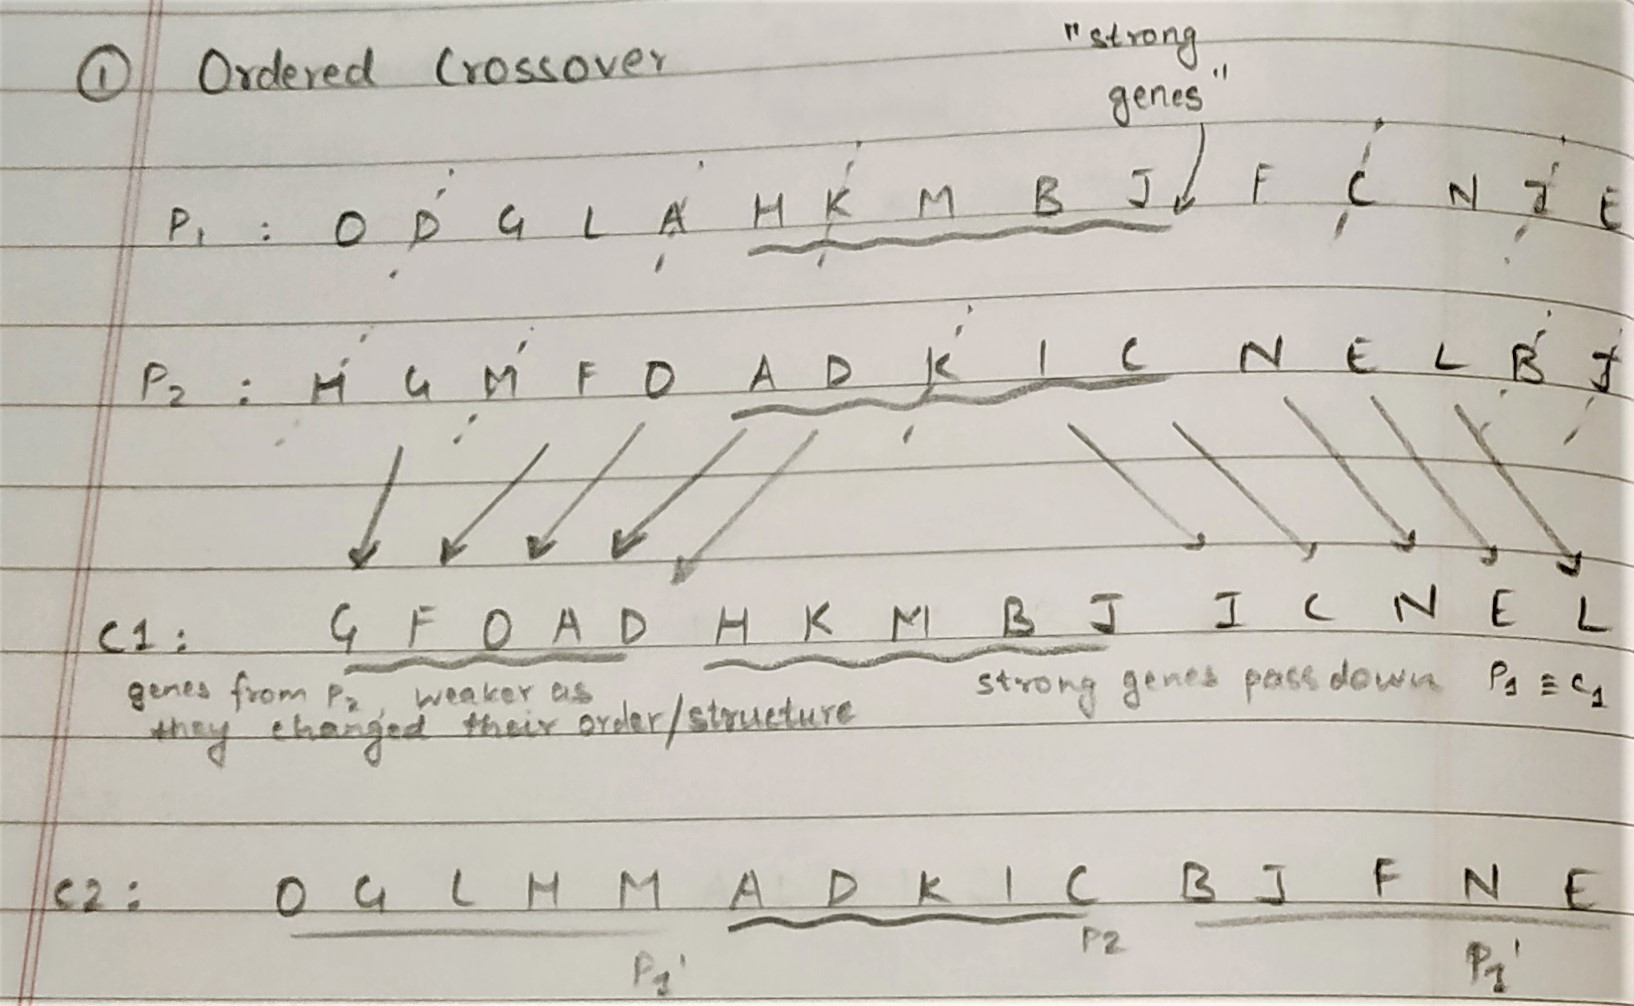

In [85]:
Image(filename="./Ordered_Crossover_Solved.jpg")

#### 2. Partially Mapped Crossover

In [86]:
def partially_mapped_crossover(P1: list[str], P2: list[str], SGS_endices: tuple[int, int]) -> tuple[list[str], list[str]]:
  """
  "SGS_endices => Strong Genes Sequence ends-indices" should have the start and end indices of strong genes { [start_index, end_index) },\n 
  i.e, the range of genes that are copied untouched in corresponding children (P_n Ξ C_n)
  """
  SGs_C1, SGs_C2 = P1[SGS_endices[0]: SGS_endices[1]], P2[SGS_endices[0]: SGS_endices[1]]   # the genes that get copied in corr. children as it is
  SGS_range = range(SGS_endices[0], SGS_endices[1])
  # Done so to copy most of the weak genes as it is (the ones not mapped to anything) as well as leaving out space for the mapped ones in corresponding children
  C1 = [city if city not in SGs_C1 else chr(33) for city in P2] 
  C2 = [city if city not in SGs_C2 else chr(33) for city in P1]
  
  # strong genes pass down as it is. for the 15 cities example, A D K I C got replaced by H K M B J so now we need to find new places in C1 for A D I C (not K since it's already placed)
  for i in SGS_range:
    C1[i] = P1[i]
    C2[i] = P2[i]
  
  for i in SGS_range:
    if P2[i] not in SGs_C1:
      to_ix = P2.index(P1[i])         # using Parents since i ranges in endices, if it would've been from 0 then SGs_n lists could've been used
      while to_ix in SGS_range:
        to_ix = P2.index(P1[to_ix])
      C1[to_ix] = P2[i]
  
  for i in SGS_range:
    if P1[i] not in SGs_C2:
      to_ix = P1.index(P2[i])         # char in P1's SGs p_mapped to char in P2 SGs
      while to_ix in range(SGS_endices[0], SGS_endices[1]):
        to_ix = P1.index(P2[to_ix])
      C2[to_ix] = P1[i]

  return C1, C2

##### Example 1 - Fixed 15 cities (manually solved, performed for validation)

In [87]:
Cx, Cy = partially_mapped_crossover(Px, Py, (5, 10))
print("Parents were: ")
tsp_printer(Px, "Px", (5, 10), 208)
tsp_printer(Py, "Py", (5, 10), 208)

print("\nChildren are: ")
tsp_printer(Cx, "Cx", (5, 10), 51)
tsp_printer(Cy, "Cy", (5, 10), 51)

Parents were: 
Px: O D G L A H K M B J F C N I E 
Py: H G M F O A D K I C N E L B J 

Children are: 
Cx: A G D F O H K M B J N E L I C 
Cy: O M G L H A D K I C F J N B E 


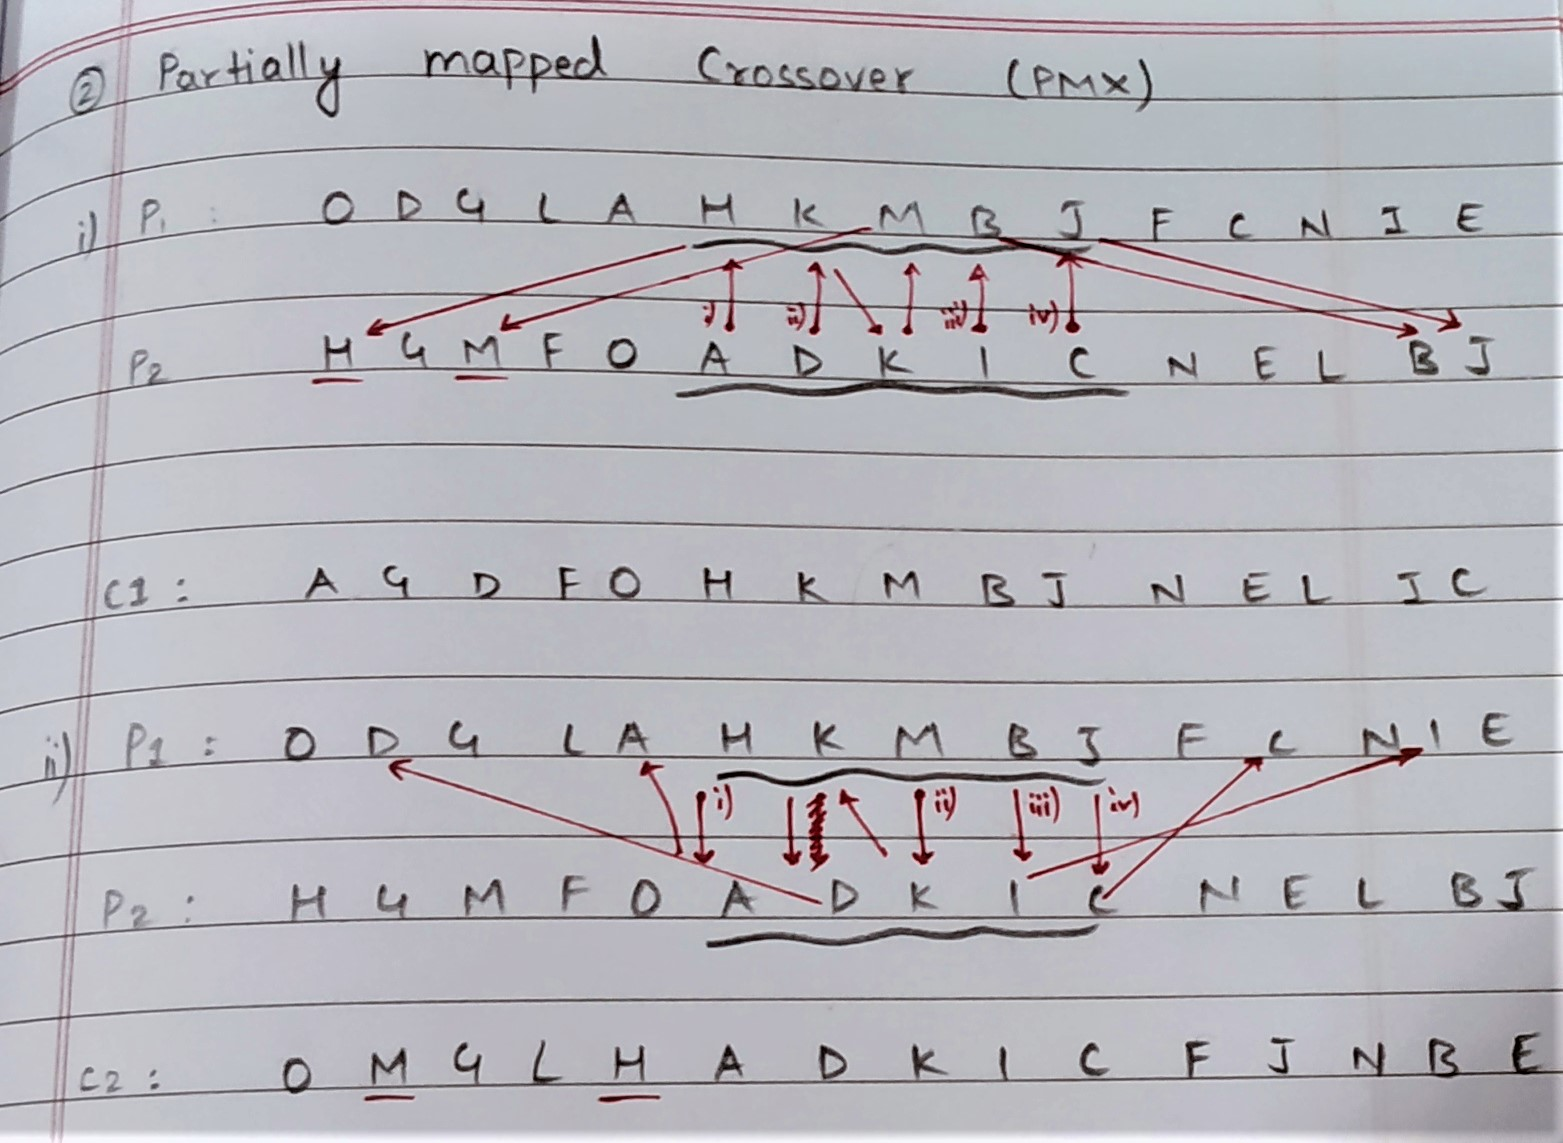

In [88]:
Image(filename="./Partially_Mapped_Crossover_Solved.jpg")

##### Example 2 - Random 26 Cities

In [89]:
C1, C2 = partially_mapped_crossover(P1, P2, (9, 16))
print("Parents were: ")
tsp_printer(P1, "P1", (9, 16), 208)
tsp_printer(P2, "P2", (9, 16), 208)

print("\nChildren are: ")
tsp_printer(C1, "C1", (9, 16), 51)
tsp_printer(C2, "C2", (9, 16), 51)

Parents were: 
P1: Q U X V Z E R A K C H Y F N O D G T I B J P S W M L 
P2: O A T P R X B W U Y V N Q G D M E K S L H C I J Z F 

Children are: 
C1: M A T P R X B W U C H Y F N O D E K S L V G I J Z Q 
C2: F U X H Z E R A K Y V N Q G D M C T I B J P S W O L 
